##Import the all the necessary libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##import Data set

In [224]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [225]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [226]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [227]:
df.shape

(100000, 9)

the data set having 100000 observation and 9 features

In [228]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


##Pre-proccesing of Data

##Missing value Treatment and Duplicate records

In [230]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

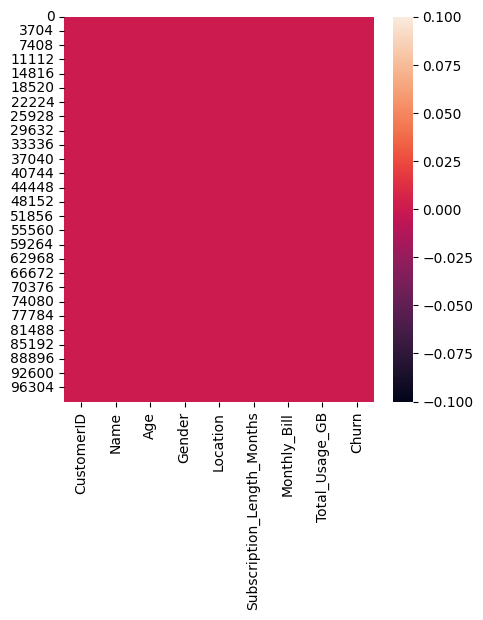

In [231]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

### duplicate record

In [232]:
df.duplicated().sum()

0

There is no Duplicate values present in the dataset

##Statistic information of Numeric and Categorical data

In [233]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Describe method will give the mean, std, min, max, 25% , 50%, 75% values of each feature

In [234]:
df.describe(include=['O'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


##Outlier Treatment

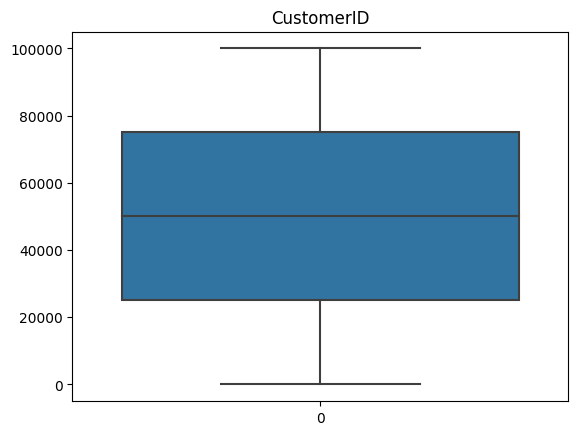

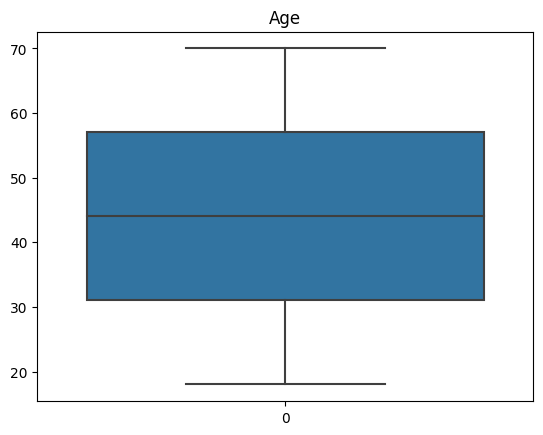

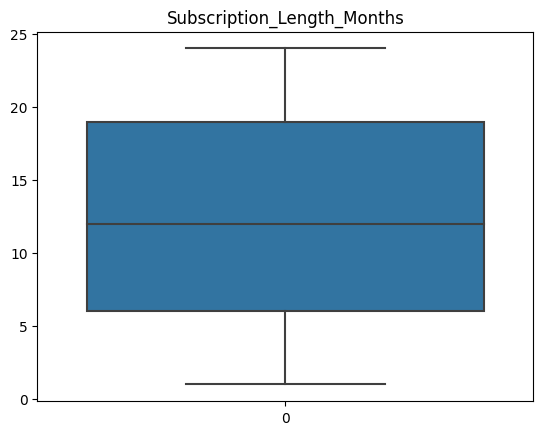

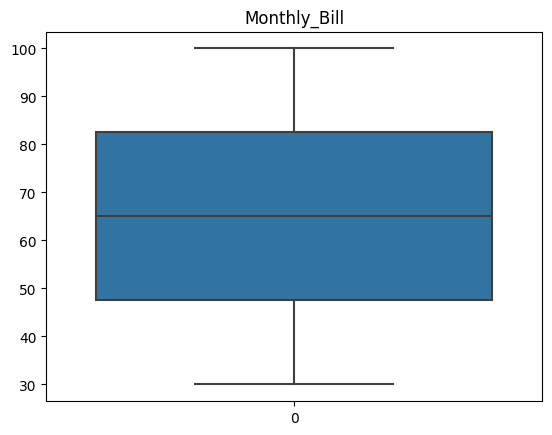

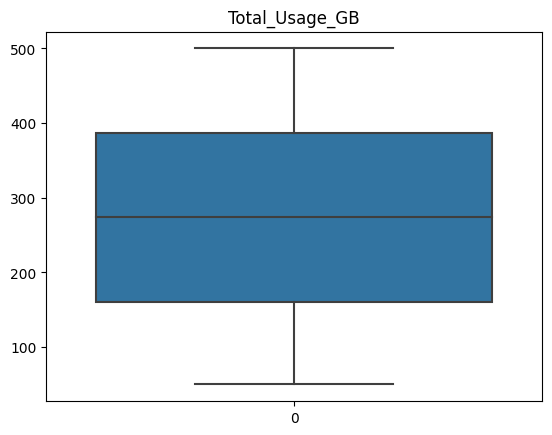

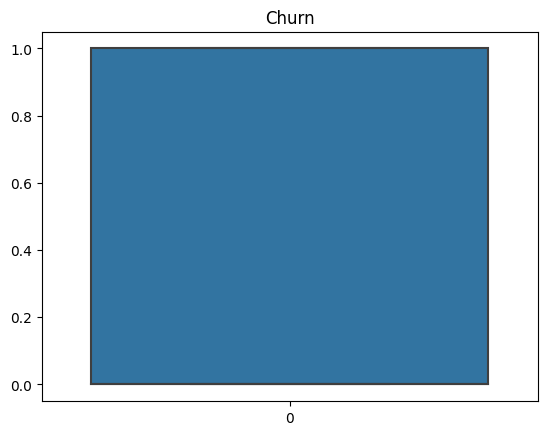

In [235]:
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

Above observation will showing no outlier present in the dataset

# Exploratery data analysis

##Univariate and Bivariate Analysis

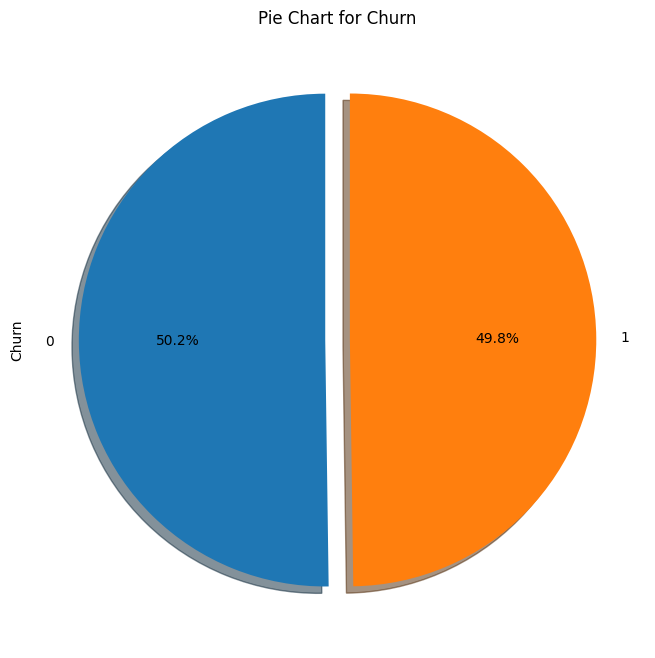

In [236]:
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

In [237]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

***almost 49.8% of customers have churned. we need to correlated to the other independent feature to dependence feature get the information***

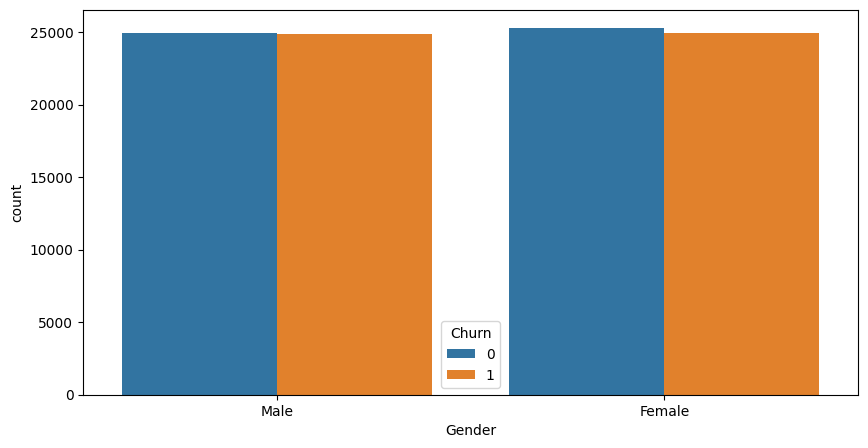

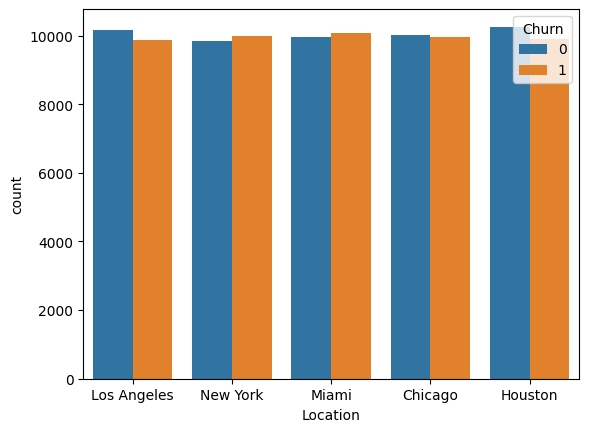

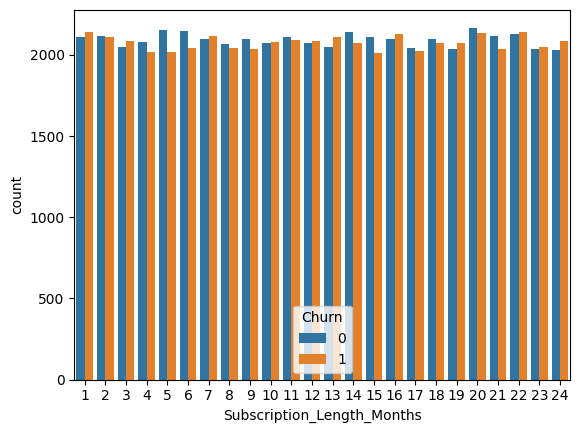

<Figure size 640x480 with 0 Axes>

In [238]:
cols = ['Gender','Location','Subscription_Length_Months',]
plt.figure(figsize=(10, 5))
for i in cols:
  sns.countplot(data=df, x=i, hue='Churn')
  plt.show()
  plt.tight_layout()

in above features show almost 50 of customers has been churn so we need to implement some best plans for the customers


###Visualize the top 10 Churn rate in the dataset from each features

In [239]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

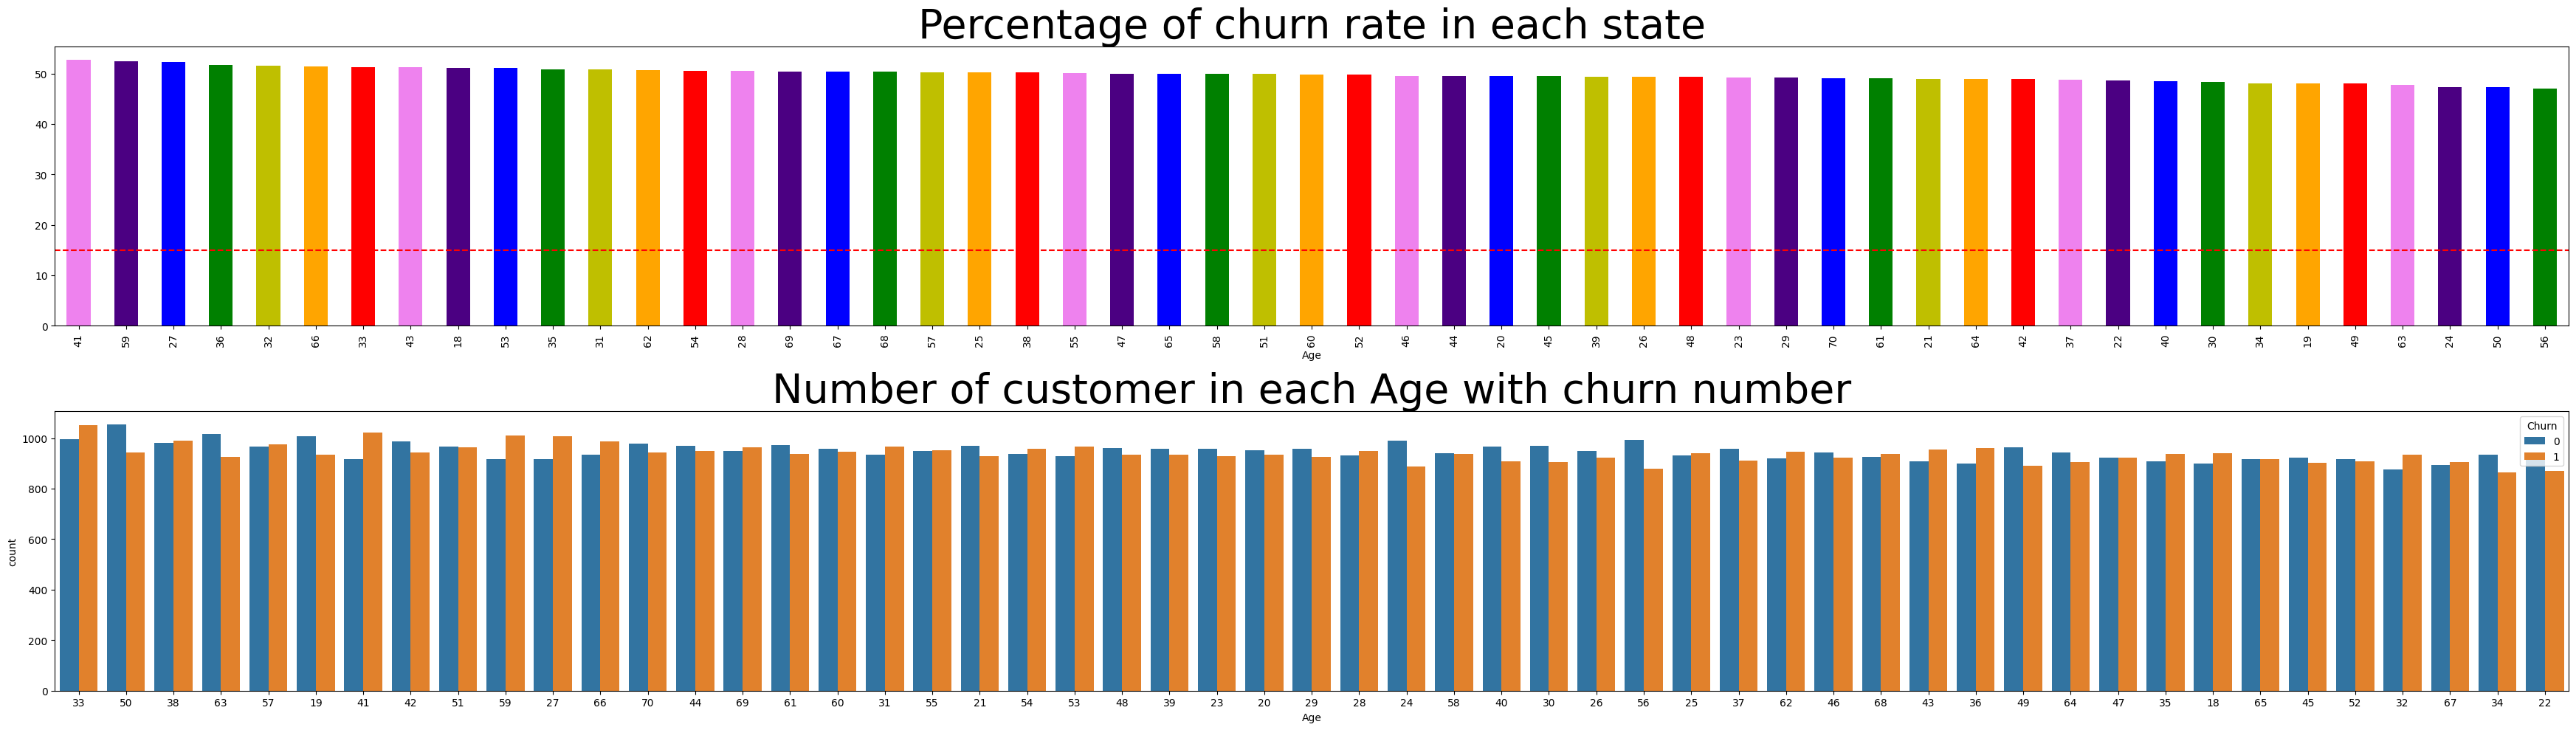

In [240]:
fontsize = 14
plt.figure(figsize=(35, 10))
plt.subplot(2, 1, 1)
d = df.groupby(['Age'])['Churn'].mean()*100
d.sort_values(ascending = False).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.axhline(y = 15, color = 'r', linestyle = '--')
plt.title("Percentage of churn rate in each state",fontsize = 40)
plt.subplot(2,1,2)
sns.countplot(x= df['Age'],hue=df['Churn'], order = (df['Age'].value_counts().index))
plt.title('Number of customer in each Age with churn number',fontsize = 40)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'percentage of churn rate in Monthly_Bill')

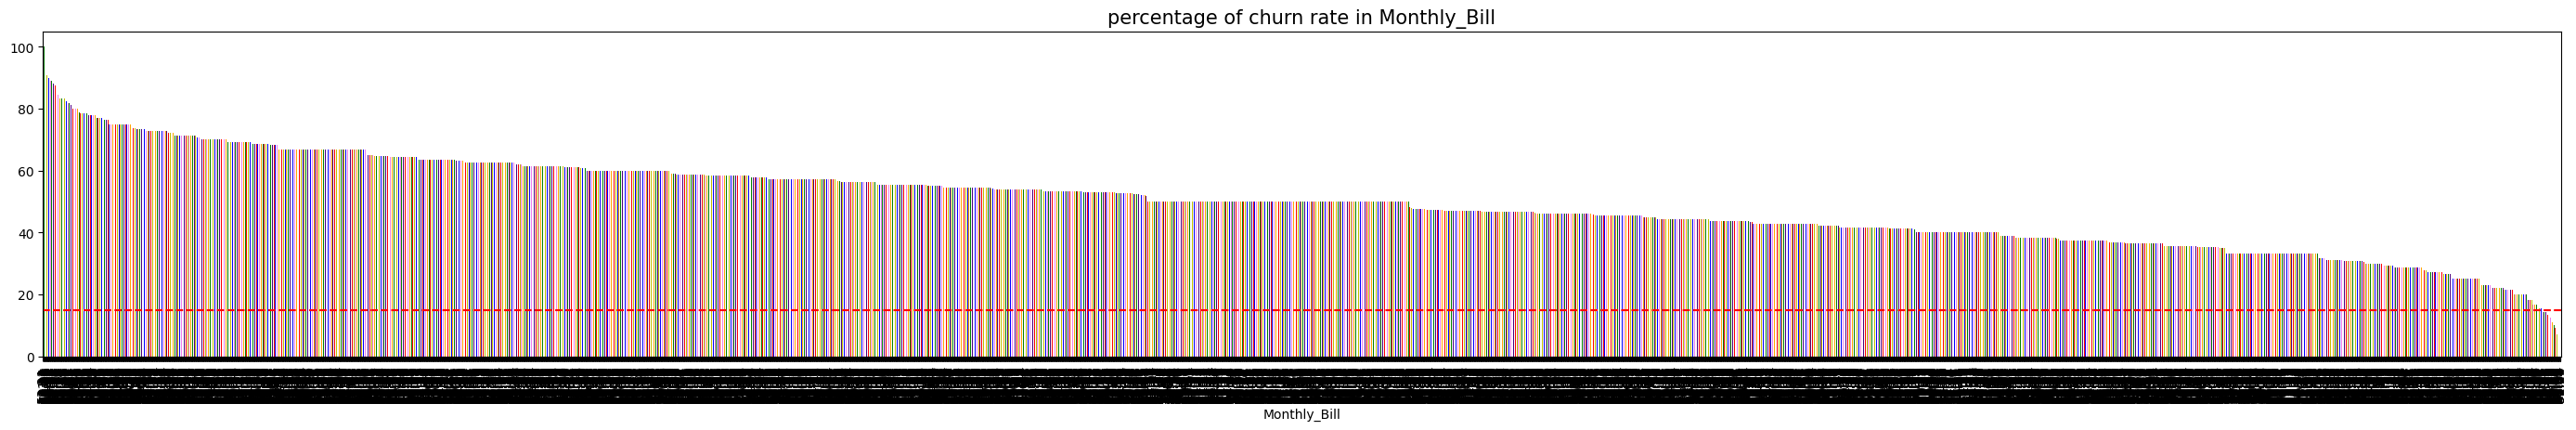

In [241]:
fontsize = 14
plt.figure(figsize=(35, 10))
plt.subplot(2, 1, 1)
d = df.groupby(['Monthly_Bill'])['Churn'].mean()*100
d.sort_values(ascending = False).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.axhline(y = 15, color = 'r', linestyle = '--')
plt.title("percentage of churn rate in Monthly_Bill",fontsize = 15)


Age,Monthly_Bill features also having more churn rate for all age group peoples

###Multivariate analysis

In [242]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<Axes: >

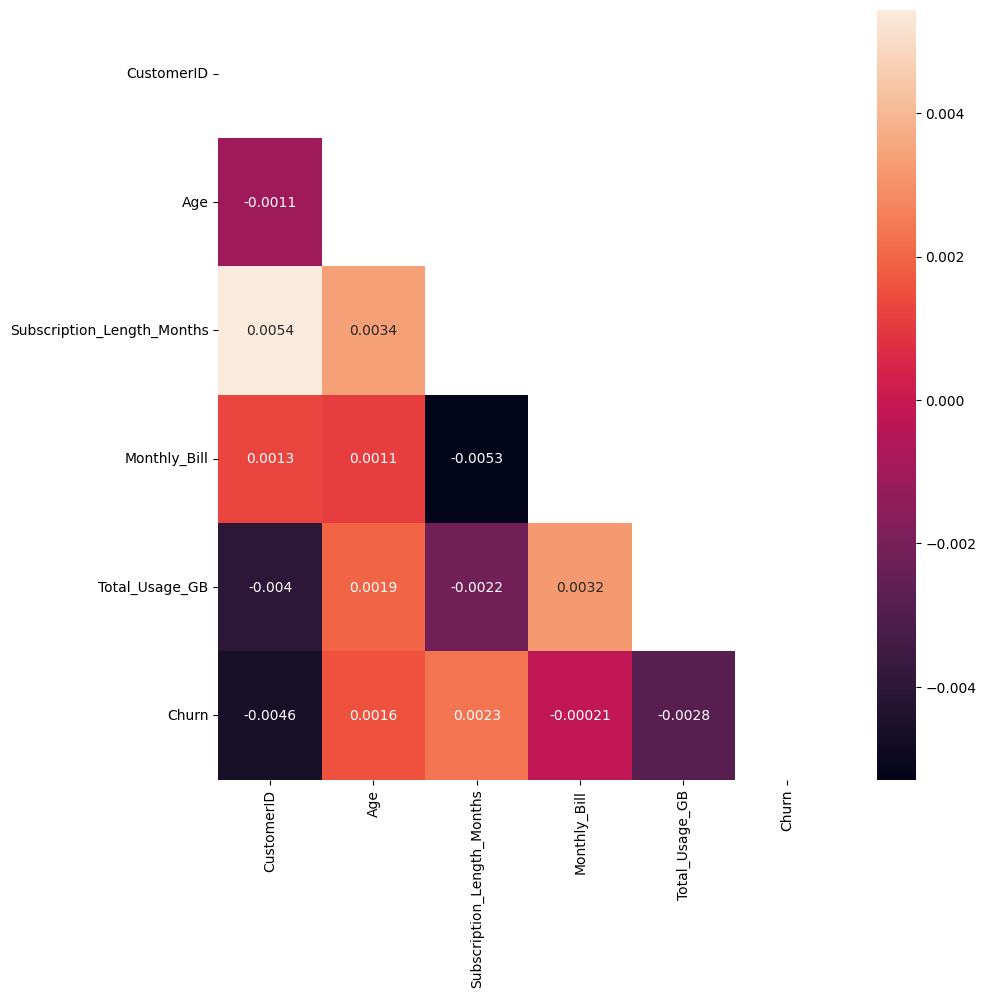

In [243]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot = True,mask=np.triu(df.corr()))

above correlation show there there is correlation between independent variable so there is no multicollinearity

#Feature Engineering

##Encoding
1. **onehot encoding**   
*  **area.cod**e having 3 unique values
*  **voice.plan** having 2 unique values
* **intl.plan** having 2 unique values
* **State** having 51 unique values



In [244]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [245]:
df.drop('CustomerID',axis=1 ,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [246]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

no need for name and customerID so we need to drop those columns

In [247]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [248]:
#Change value in country column
df['Location'] = df['Location'].replace(['Los Angeles'],'0')
df['Location'] = df['Location'].replace(['New York'],'1')
df['Location'] = df['Location'].replace(['Houston'],'2')
df['Location'] = df['Location'].replace(['Chicago'],'3')
df['Location'] = df['Location'].replace(['Miami'],'4')


#Change value in gender column
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')

In [260]:
df['Location'] = pd.to_numeric(df['Location'])
df['Gender'] = pd.to_numeric(df['Gender'])

In [249]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,0,17,73.36,236,0
1,62,0,1,1,48.76,172,0
2,24,0,0,5,85.47,460,0
3,36,0,4,3,97.94,297,1
4,46,0,4,19,58.14,266,0


In [250]:
df['Location'].value_counts()

2    20157
0    20041
4    20031
3    19958
1    19813
Name: Location, dtype: int64

##Feature selection and model building

###Split the data to independent variable and dependent variable

In [261]:
x = df.drop(['Churn'],axis=1)


In [262]:
y = df['Churn']
x.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,1,0,17,73.36,236
1,62,0,1,1,48.76,172
2,24,0,0,5,85.47,460
3,36,0,4,3,97.94,297
4,46,0,4,19,58.14,266


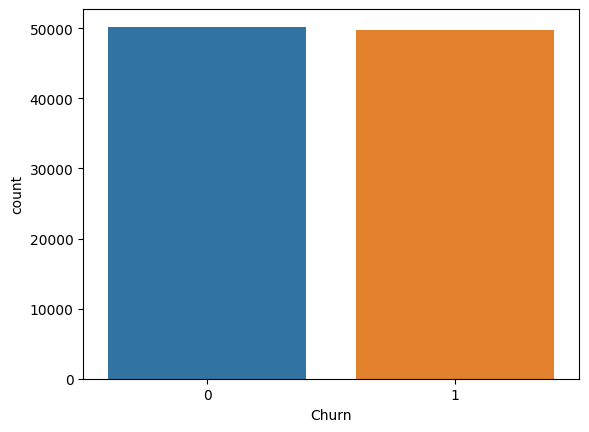

In [253]:
sns.countplot(x=df.Churn);

##Spliting the data to Test and Train

In [263]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [264]:
y_train.shape

(80000,)

##Min-Max scaller

In [171]:

# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(x_train)
scaled_x=model.transform(x_train)
scaled_test=model.transform(x_test)



In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

g2=GaussianNB()
b2=BernoulliNB()
KN2=KNeighborsClassifier()
SVC2=SVC()
D2=DecisionTreeClassifier()
R2=RandomForestClassifier()
Log2=LogisticRegression()
XGB2=XGBClassifier()

In [173]:
algos=[g2,b2,KN2,SVC2,D2,R2,Log2,XGB2]

In [174]:
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']

In [175]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,confusion_matrix

accuracy_scored=[]
precision_scored=[]
recall_scored=[]
f1_scored=[]
for item in algos:
  item.fit(scaled_x,y_train)
  item.predict(scaled_test)
  accuracy_scored.append(accuracy_score(y_test,item.predict(scaled_test)))
  precision_scored.append(precision_score(y_test,item.predict(scaled_test)))
  recall_scored.append(recall_score(y_test,item.predict(scaled_test)))
  f1_scored.append(f1_score(y_test,item.predict(scaled_test)))


In [176]:
# create dataframe with results
result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
result['f1_score']=f1_scored
result['recall_score']=recall_scored
result['precision_score']=precision_scored
result['accuracy_score']=accuracy_scored
result.sort_values('accuracy_score',ascending=False)

,f1_score,recall_score,precision_score,accuracy_score
BernoulliNB,0.453943,0.417498,0.497358,0.50175
XGBClassifier,0.491825,0.486644,0.497117,0.50115
GaussianNB,0.384521,0.315492,0.492216,0.49900
KNeighborsClassifier,0.494986,0.495011,0.494961,0.49895
SVC,0.444112,0.403689,0.493530,0.49870
RandomForestClassifier,0.482670,0.471626,0.494243,0.49850
DecisionTreeClassifier,0.494289,0.495111,0.493470,0.49745
LogisticRegression,0.375504,0.305312,0.487605,0.49625


In [187]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='softmax')  # 3 classes: Increase, Decrease, Stable
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [188]:
history = model.fit(scaled_x, y_train, epochs=20, batch_size=32, validation_data=(scaled_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 2/20
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 3/20
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 5/20
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0000e+00 -

In [189]:
test_loss, test_accuracy = model.evaluate(scaled_test, y_test)
print("Test Accuracy:", test_accuracy)

625/625 [==============================] - 1s 968us/step - loss: 0.0000e+00 - accuracy: 0.4961
Test Accuracy: 0.49605000019073486


#Hyperparameter Tuning


In [259]:
x_train.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
75220,54,0,1,5,84.50,205
48955,28,1,1,24,82.06,239
44966,57,1,3,12,52.29,62
13568,19,1,2,19,32.57,173
92727,56,0,4,8,33.52,314


In [265]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Use GridSearchCV for exhaustive search over the parameter grid
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(x_train, y_train)

# Print the best parameters and best accuracy from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use RandomizedSearchCV for randomized search over the parameter grid
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=1)
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


KeyboardInterrupt: ignored

#Pickling the model

In [266]:
import pickle

In [267]:
filename = 'classifier.pkl'

In [268]:
pickle.dump(b2, open(filename, 'wb'))

In [269]:
load_model = pickle.load(open(filename, 'rb'))

In [270]:
model_score_r1 = load_model.score(x_train, y_train)

In [271]:
round(model_score_r1,2)

0.5

In [272]:
model_score_r3 = load_model.score(x_test, y_test)

In [273]:
round(model_score_r3,2)

0.5

In [276]:
y_predict = b2.predict(x_test)
y_predictt = b2.predict(x_train)

In [277]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.61      0.51      0.55     12099
           1       0.40      0.50      0.44      7901

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.52      0.50      0.51     20000



In [278]:
print(classification_report(y_predictt,y_train))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55     48067
           1       0.40      0.50      0.44     31933

    accuracy                           0.50     80000
   macro avg       0.50      0.50      0.50     80000
weighted avg       0.52      0.50      0.51     80000



In [279]:
x_test.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')

In [ ]:

import numpy as np
import pickle
import pandas as pd
import streamlit as st

from PIL import Image

pickle_in = open("classifier.pkl","rb")
classifier=pickle.load(pickle_in)

#@app.route('/')
def welcome():
    return "Welcome All"

#@app.route('/predict',methods=["Get"])

def predict_note_authentication(Age,Gender,Location,Subscription_Length_Months,Monthly_Bill, Total_Usage_GB):
  feat_list = np.array([[Age,Gender,Location,Subscription_Length_Months,Monthly_Bill, Total_Usage_GB]], dtype=object)
  prediction=classifier.predict(feat_list)
  print(prediction)
  if (prediction[0]==0):
    return 'the customers has not churn'
  else:
    return 'the customers has been churned'


def main():
  image2 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScH7E1EXIo1ZphKFXpqkWNFX5OA-JYB8g5tw&usqp=CAU'
  image = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQT4xf_3hVeSgHEb2YGbvBerVIX_oJJxEZKNWeti8TrSat3-Y-wJyVZAGc1vSt3za4y1TM&usqp=CAU'
  st.image(image,use_column_width=False)

  add_selectbox = st.sidebar.selectbox("How would you like to predict?",("Online", "Batch"))
  st.sidebar.info('''the feature name and order must be in same of below [[Age,Gender,Location,Subscription_Length_Months,Monthly_Bill, Total_Usage_GB]] ''')
  st.sidebar.image(image2)
  st.title("Predicting Customer Churn")
  html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Telecom churn rate ML App </h2>
    </div>
    """
  if add_selectbox == 'Online':
      st.markdown(html_temp,unsafe_allow_html=True)
      Age = st.text_input("Age",key ="Age")
      Gender = st.selectbox('Gender 1 is male or 0 is Female', ['1', '0'])
      Location = st.selectbox('Location 0 is Los Angeles ,or 1 is New York,or 2 is Houston, or 3 is Chicago ,or 4 is Miami', ['0', '1','2','3','4'])
      Subscription_Length_Months = st.text_input("Subscription_Length_Months",key ="Subscription_Length_Months")
      Monthly_Bill = st.text_input("Monthly_Bill",key ="Monthly_Bill")
      Total_Usage_GB = st.text_input("Total_Usage_GB",key ="Total_Usage_GB")

      result=""
      if st.button("Predict"):
          result=predict_note_authentication(Age,Gender,Location,Subscription_Length_Months,Monthly_Bill, Total_Usage_GB)
      st.success('{}'.format(result))
  if add_selectbox == 'Batch':
    file_upload = st.file_uploader("Upload csv file for predictions", type=["csv"])
    if file_upload is not None:
      data = pd.read_csv(file_upload,encoding= 'unicode_escape')
      result=classifier.predict(data)
      st.success('The output is {}'.format(result))
      result1 = pd.DataFrame(result)
      data['churn'] = result1
      data['churn'] = data['churn'].replace(0, 'not churn')
      data['churn'] = data['churn'].replace(1, 'churn')
      st.download_button(label='download csv',data=data.to_csv(),mime='text/csv')

if __name__=='__main__':
    main()